# K-Nearest Neighbors for Regression

In this notebook we'll both implement some $k$-nearest neighbor regression models using scikit-learn, and think conceptually about what the $k$-nearest neighbors algorithm does.

In [123]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

## A Single Quantitative Feature

Recall the K-Nearest Neighbors model for predicting quality (log(price)) from age for the wine data. In the reading, we created a plot of the 5-nearest neighbors regression function using the following code. (This code is all in the reading; I've just copied it here.)

In [125]:
data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")

# Split the data into training and test sets.
bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_test = bordeaux_df.loc[1981:].copy()

# Log transform the target.
bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])
bordeaux_train.head()

X_train = bordeaux_train[["age"]]
y_train = bordeaux_train["log(price)"]

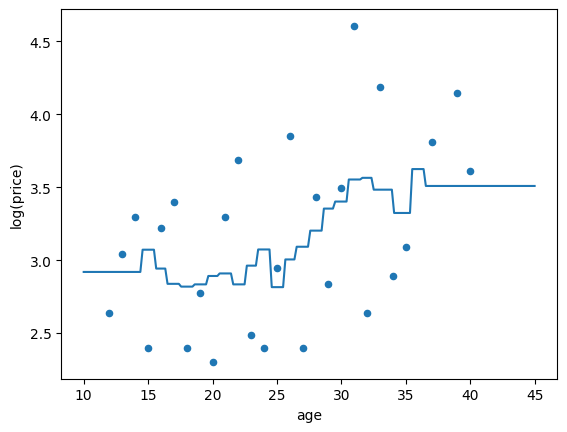

In [126]:
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)

# Plot the predictions.
bordeaux_train.plot.scatter(x="age", y="log(price)")
y_new_.plot.line();

**This section contains some conceptual questions to think about and discuss with your partner.**

1\. Explain intuitively why the 5-nearest neighbors regression function has this shape.

This regression has the shape of a piece-wise because it is the average of the 5 nearest neighbors. The regression is a straight line because the nearest neighbors are all in a straight line. For example, ages greater than 37 have a regression of 3.5 because the nearest neighbors are all 3.5.

2\. What would the 1-nearest neighbors regression function look like? Make a sketch and explain intuitively.

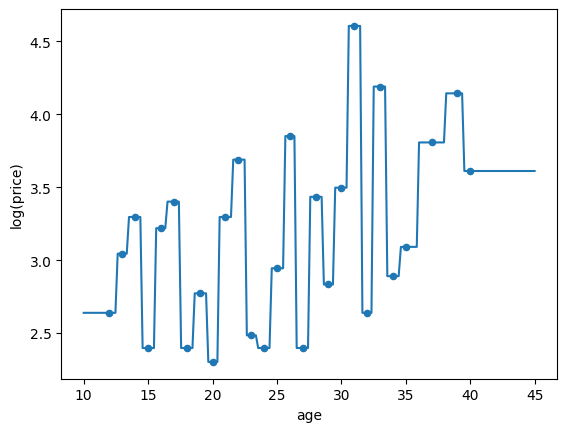

In [127]:
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)

# Plot the predictions.
bordeaux_train.plot.scatter(x="age", y="log(price)")
y_new_.plot.line();

Here all the points have their own regression line. The regression line is the point itself. This is because the nearest neighbor is itself.

3\. What would the 27-nearest neighbors regression function look like? Make a sketch and explain intuitively. Hint: what is special about 27 in this example?

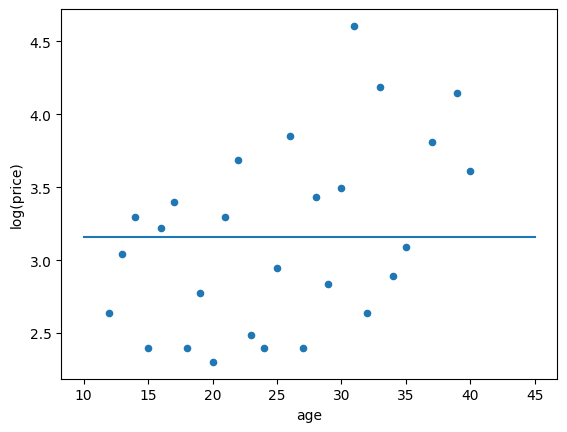

In [128]:
# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=27)
model.fit(X=X_train, y=y_train)

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)

# Plot the predictions.
bordeaux_train.plot.scatter(x="age", y="log(price)")
y_new_.plot.line();

The graph of the 27-nearest neighbors regression function would be a straight line. This is because there are only 27 points in the data set. Therefore, the regression line would be the average of all the points.

**Think about and discuss the previous questions first, then run the following code and discuss the output.**

4\. The following code plots the $k$-nearest neighbors regression function for predicting the quality (log(price)) of a wine from its age for $k=1, 5, 10, 20, 27$. How does the regression function change as $k$ increases?

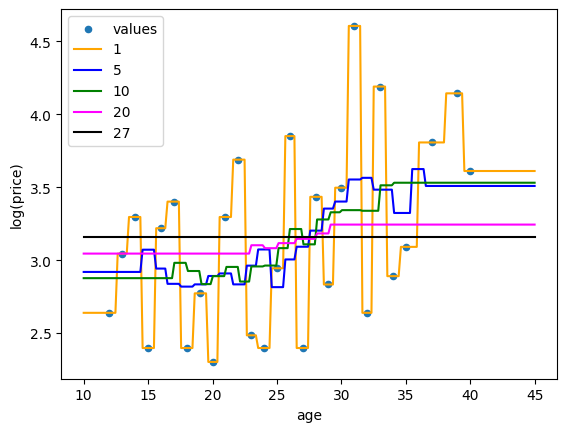

In [129]:
ks = [1, 5, 10, 20, 27]
colors = ["orange", "blue", "green", "magenta", "black"]

bordeaux_train.plot.scatter(x="age", y="log(price)")

# Define a grid of feature values.
X_new = pd.DataFrame()
X_new["age"] = np.linspace(10, 45, num=200)

for i in range(len(ks)):

  # Fit k-nearest neighbors
  model = KNeighborsRegressor(n_neighbors=ks[i])
  model.fit(X=X_train, y=y_train)

  # Make predictions at those feature values.
  y_new_ = pd.Series(
      model.predict(X_new),
      index=X_new["age"]
  )

  # Plot the predictions.
  y_new_.plot.line(color = colors[i])
  plt.legend(["values"] + ks);


## A Single Categorical Feature

Recall the Ames housing data set. We'll use a single categorical feature---Neighborhood---to predict SalePrice.

**Note:** some of the code from the "Categorical Features in Regression Models" notebook from Day 12 might be helpful. That notebook concerned linear regression, but you can just replace that with $k$-nearest neighbors.

In [130]:
df_ames = pd.read_csv("http://dlsun.github.io/pods/data/AmesHousing.txt", sep = "\t")

df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


1\. Build a $10$-nearest neighbors model to predict house price using **Neighborhood** as the only feature.

In [131]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (OneHotEncoder(), ["Neighborhood"]),
    remainder = "drop"
)
ct

ColumnTransformer(transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Neighborhood'])])

In [132]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)

model.fit(X=df_ames[['Neighborhood']], y=df_ames["SalePrice"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

2\. Use the model to predict the price for each neighborhood.

In [133]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
y_new_ = pd.Series(
    model.predict(X=df_ames[['Neighborhood']]),
    index=df_ames["Neighborhood"]
)
pred = y_new_.groupby("Neighborhood").mean().sort_values().reset_index()
pred.columns = ["Neighborhood", "SalePrice"]
pred

,Neighborhood,SalePrice
0,IDOTRR,83780.7
1,MeadowV,87225.0
2,BrDale,106150.0
3,OldTown,112480.0
4,SWISU,114826.9
5,BrkSide,127580.0
6,Sawyer,131000.0
7,NPkVill,138955.0
8,Edwards,142843.0
9,Blueste,143590.0


**This is a conceptual question to think about and discuss with your partner.**

3\. Compare the predicted prices to the mean price for each neighborhood. For what neighborhood is the predicted price equal to the neighborhood's mean price? Why? What is special about that neighborhood? Can you explain why the predicted prices don't match the mean price for the other neighborhoods?

In [134]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
actual = df_ames.groupby("Neighborhood")["SalePrice"].mean().sort_values().reset_index()

pred_vs_actual = pd.merge(pred, actual, on = "Neighborhood", suffixes = ["_pred", "_actual"])

pred_vs_actual["Diff"] = pred_vs_actual["SalePrice_pred"] - pred_vs_actual["SalePrice_actual"]
pred_vs_actual

,Neighborhood,SalePrice_pred,SalePrice_actual,Diff
0,IDOTRR,83780.7,103752.903226,-19972.203226
1,MeadowV,87225.0,95756.486486,-8531.486486
2,BrDale,106150.0,105608.333333,541.666667
3,OldTown,112480.0,123991.891213,-11511.891213
4,SWISU,114826.9,135071.937500,-20245.037500
5,BrkSide,127580.0,124756.250000,2823.750000
6,Sawyer,131000.0,136751.152318,-5751.152318
7,NPkVill,138955.0,140710.869565,-1755.869565
8,Edwards,142843.0,130843.381443,11999.618557
9,Blueste,143590.0,143590.000000,0.000000


In [135]:
df_ames["Neighborhood"].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

Blueste Neighborhood has equal predicted price and mean price. This is because there is are 10 houses in this neighborhood and our KNN is using 10 neighbors to predict the price. The predicted prices don't match the mean price for the other neighborhoods because the KNN is using the average of the 10 nearest neighbors to predict the price. The mean price is the average of all the houses in the neighborhood.

## Housing data

1\. Fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**).

In [136]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

ct = make_column_transformer(
    (StandardScaler(), ["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Gr Liv Area', 'Bedroom AbvGr', 'Full Bath',
                                  'Half Bath'])])

In [137]:
pipeline = make_pipeline(
    ct,
    KNeighborsRegressor(n_neighbors=10)
)

pipeline.fit(X=df_ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath",
                           "Half Bath"]],
             y=df_ames["SalePrice"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'Bedroom AbvGr', 'Full Bath',
                                                   'Half Bath'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [138]:
y_new = pd.Series(
    pipeline.predict(X=df_ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath",
                                "Half Bath"]]),
    index=df_ames.index
)

y_new

0       158650.0
1       108065.0
2       143540.0
3       251959.8
4       188340.0
          ...   
2925    133230.0
2926    109640.0
2927    118205.0
2928    150130.0
2929    255379.0
Length: 2930, dtype: float64

2\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood.

In [139]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
import plotly.express as px

pred_vs_actual = pd.DataFrame({
    "SalePrice_pred": y_new,
    "SalePrice_actual": df_ames["SalePrice"],
    "Neighborhood": df_ames["Neighborhood"]
})

pred_vs_actual

,SalePrice_pred,SalePrice_actual,Neighborhood
0,158650.0,215000,NAmes
1,108065.0,105000,NAmes
2,143540.0,172000,NAmes
3,251959.8,244000,NAmes
4,188340.0,189900,Gilbert
...,...,...,...
2925,133230.0,142500,Mitchel
2926,109640.0,131000,Mitchel
2927,118205.0,132000,Mitchel
2928,150130.0,170000,Mitchel


In [140]:
pred_vs_actual[pred_vs_actual["Neighborhood"] == "Gilbert"]

,SalePrice_pred,SalePrice_actual,Neighborhood
4,188340.0,189900,Gilbert
5,185135.0,195500,Gilbert
9,237210.0,189000,Gilbert
10,191143.5,175900,Gilbert
11,158200.0,185000,Gilbert
...,...,...,...
2437,238836.3,215000,Gilbert
2438,199421.0,199900,Gilbert
2439,190835.0,173000,Gilbert
2440,325578.9,287602,Gilbert


In [141]:
px.scatter(pred_vs_actual, x = pred_vs_actual["SalePrice_actual"], y = pred_vs_actual["SalePrice_pred"], color = pred_vs_actual["Neighborhood"])

3\. Fit a 10-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), number of half bathrooms (**Half Bath**), and **Neighborhood**.

In [142]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
ct2 = make_column_transformer(
    (StandardScaler(), ["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]),
    (OneHotEncoder(), ["Neighborhood"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct2

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Gr Liv Area', 'Bedroom AbvGr', 'Full Bath',
                                  'Half Bath']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Neighborhood'])])

In [143]:
pipeline2 = make_pipeline(
    ct2,
    KNeighborsRegressor(n_neighbors=10)
)

pipeline2.fit(X=df_ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath",
                           "Neighborhood"]],
             y=df_ames["SalePrice"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Gr Liv Area',
                                                   'Bedroom AbvGr', 'Full Bath',
                                                   'Half Bath']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Neighborhood'])])),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=10))])

In [144]:
y_new = pd.Series(
    pipeline2.predict(X=df_ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath",
                                "Half Bath", "Neighborhood"]]),
    index=df_ames.index
)

y_new

0       154180.0
1       125250.0
2       159450.0
3       203340.0
4       183690.0
          ...   
2925    136145.0
2926    137585.0
2927    133915.0
2928    145070.0
2929    258990.0
Length: 2930, dtype: float64

4\. For the model in the previous part, make a scatterplot of actual price versus predicted price. Color the points by Neighborhood. How does adding Neighborhood change the predictions?

In [145]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
pred_vs_actual = pd.DataFrame({
    "SalePrice_pred": y_new,
    "SalePrice_actual": df_ames["SalePrice"],
    "Neighborhood": df_ames["Neighborhood"]
})

pred_vs_actual

,SalePrice_pred,SalePrice_actual,Neighborhood
0,154180.0,215000,NAmes
1,125250.0,105000,NAmes
2,159450.0,172000,NAmes
3,203340.0,244000,NAmes
4,183690.0,189900,Gilbert
...,...,...,...
2925,136145.0,142500,Mitchel
2926,137585.0,131000,Mitchel
2927,133915.0,132000,Mitchel
2928,145070.0,170000,Mitchel


In [146]:
pred_vs_actual[pred_vs_actual["Neighborhood"] == "Gilbert"]

,SalePrice_pred,SalePrice_actual,Neighborhood
4,183690.0,189900,Gilbert
5,188599.0,195500,Gilbert
9,197643.2,189000,Gilbert
10,178520.0,175900,Gilbert
11,176297.5,185000,Gilbert
...,...,...,...
2437,207115.0,215000,Gilbert
2438,219375.0,199900,Gilbert
2439,177420.0,173000,Gilbert
2440,305861.0,287602,Gilbert


In [147]:
px.scatter(pred_vs_actual, x = pred_vs_actual["SalePrice_actual"], y = pred_vs_actual["SalePrice_pred"], color = pred_vs_actual["Neighborhood"])

5\. Use each of the models that you fit --- there should be two --- to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, 1 half bath in the NAmes neighborhood. Compare to the predicts you made for linear regression models (from Day 12).

In [148]:
# YOUR CODE HERE. ADD CELLS AS NEEDED
x_test = pd.Series({
    "Gr Liv Area": 1500,
    "Bedroom AbvGr": 3,
    "Full Bath": 2,
    "Half Bath": 1,
    "Neighborhood": "NAmes"
})

In [149]:
pipeline.predict(X=pd.DataFrame([x_test]))

array([175747.5])

In [150]:
pipeline2.predict(X=pd.DataFrame([x_test]))

array([180590.])

6\. Consider a $k$-nearest neighbors regression model that predicts the price (just **SalePrice**, not log) of a home using square footage (**Gr Liv Area**), number of bedrooms (**Bedroom AbvGr**), number of full bathrooms (**Full Bath**), and number of half bathrooms (**Half Bath**). (Same setup as in part 1 but with a general value of $k$ instead of 10). For $k=1, 2, \ldots, 100$ fit the $k$-nearest neighbors regression model and use it to predict the price of a home that is 1500 square feet, with 3 bedrooms, 2 full baths, 1 half bath in the NAmes neighborhood. Plot the predicted price versus $k$. How do the predictions change as $k$ increases? What would happen as $k$ gets larger and larger?

In [151]:
# YOUR CODE HERE. ADD CELLS AS NEEDED

ct6 = make_column_transformer(
    (StandardScaler(), ["Gr Liv Area", "Bedroom AbvGr", "Full Bath", "Half Bath"]),
    remainder="drop"  # all other columns in X will be dropped.
)
ct6

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Gr Liv Area', 'Bedroom AbvGr', 'Full Bath',
                                  'Half Bath'])])

Text(0, 0.5, 'Predicted SalePrice')

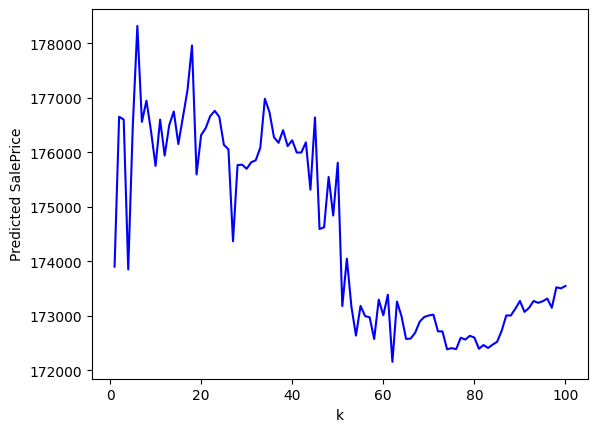

In [152]:
y_new_ = {}
for i in range(1, 101):

    pipeline3 = make_pipeline(
        ct6,
        KNeighborsRegressor(n_neighbors=i)
    )
    pipeline3.fit(X=df_ames[["Gr Liv Area", "Bedroom AbvGr", "Full Bath",
                           "Half Bath"]],
             y=df_ames["SalePrice"])

    y_new_[i] = pipeline3.predict(X=pd.DataFrame([x_test]))[0]


ks = y_new_.keys()
values = y_new_.values()

plt.plot(ks, values, color = "blue")
plt.xlabel("k")
plt.ylabel("Predicted SalePrice")